<center>
    
    COMP4240/5435 - Reinforcement Learning
    
# Homework 7 - Eligibility Traces and TD($\lambda$)

</center>

Q1. For a task with three states $s_1,s_2,s_3$ where $s_i \in \mathbb{R}$ generate the feature vectors using

(a) order-3 polynomial-bases $x_i(s) = \prod_{j=1}^k s_j^{c_{i,j}}$ 
> Answer: <br>
For order-3, $c_{i,j}\in[0,3]$ and total features$ = (n+1)^k=4^3=64$. The features are given as a list below, where each item represents a feature.<br> 

> $[s_1^0s_2^0s_3^0 ,
s_1^0s_2^0s_3^1 ,
s_1^0s_2^0s_3^2 ,
s_1^0s_2^0s_3^3 ,
s_1^0s_2^1s_3^0 ,
s_1^0s_2^1s_3^1 ,
s_1^0s_2^1s_3^2 ,
s_1^0s_2^1s_3^3 ,
s_1^0s_2^2s_3^0 ,
s_1^0s_2^2s_3^1 ,
s_1^0s_2^2s_3^2 ,
s_1^0s_2^2s_3^3 ,
s_1^0s_2^3s_3^0 ,
s_1^0s_2^3s_3^1 ,
s_1^0s_2^3s_3^2 ,
s_1^0s_2^3s_3^3 ,
s_1^1s_2^0s_3^0 ,
s_1^1s_2^0s_3^1 ,
s_1^1s_2^0s_3^2 ,
s_1^1s_2^0s_3^3 ,
s_1^1s_2^1s_3^0 ,
s_1^1s_2^1s_3^1 ,
s_1^1s_2^1s_3^2 ,
s_1^1s_2^1s_3^3 ,
s_1^1s_2^2s_3^0 ,
s_1^1s_2^2s_3^1 ,
s_1^1s_2^2s_3^2 ,
s_1^1s_2^2s_3^3 ,
s_1^1s_2^3s_3^0 ,
s_1^1s_2^3s_3^1 ,
s_1^1s_2^3s_3^2 ,
s_1^1s_2^3s_3^3 ,
s_1^2s_2^0s_3^0 ,
s_1^2s_2^0s_3^1 ,
s_1^2s_2^0s_3^2 ,
s_1^2s_2^0s_3^3 ,
s_1^2s_2^1s_3^0 ,
s_1^2s_2^1s_3^1 ,
s_1^2s_2^1s_3^2 ,
s_1^2s_2^1s_3^3 ,
s_1^2s_2^2s_3^0 ,
s_1^2s_2^2s_3^1 ,
s_1^2s_2^2s_3^2 ,
s_1^2s_2^2s_3^3 ,
s_1^2s_2^3s_3^0 ,
s_1^2s_2^3s_3^1 ,
s_1^2s_2^3s_3^2 ,
s_1^2s_2^3s_3^3 ,
s_1^3s_2^0s_3^0 ,
s_1^3s_2^0s_3^1 ,
s_1^3s_2^0s_3^2 ,
s_1^3s_2^0s_3^3 ,
s_1^3s_2^1s_3^0 ,
s_1^3s_2^1s_3^1 ,
s_1^3s_2^1s_3^2 ,
s_1^3s_2^1s_3^3 ,
s_1^3s_2^2s_3^0 ,
s_1^3s_2^2s_3^1 ,
s_1^3s_2^2s_3^2 ,
s_1^3s_2^2s_3^3 ,
s_1^3s_2^3s_3^0 ,
s_1^3s_2^3s_3^1 ,
s_1^3s_2^3s_3^2 ,
s_1^3s_2^3s_3^3 ]$

(b) order-3 Fourier-bases $x_i(s)= \cos(\pi \mathbf{s}^{\top}\mathbf{C}^i)$
>Answer: <br>For order-3, $c_{i,j}\in[0,3]$ and total features$ = (n+1)^k=4^3=64$. <br>The features are given as a list below, where each item represents a feature.<br> The coefficients are multiplied with the states, and then each feature is represented as $cos(\pi(c_{(i,1)}\times s_1+c_{(i,2)}\times s_2+c_{(i,3)}\times s_3))$.

>$[\cos(\pi(0.s_1+0.s_2+0.s_3)) ,
\cos(\pi(0.s_1+0.s_2+1.s_3)) ,
\cos(\pi(0.s_1+0.s_2+2.s_3)) ,
\cos(\pi(0.s_1+0.s_2+3.s_3)) ,
\cos(\pi(0.s_1+1.s_2+0.s_3)) ,
\cos(\pi(0.s_1+1.s_2+1.s_3)) ,
\cos(\pi(0.s_1+1.s_2+2.s_3)) ,
\cos(\pi(0.s_1+1.s_2+3.s_3)) ,
\cos(\pi(0.s_1+2.s_2+0.s_3)) ,
\cos(\pi(0.s_1+2.s_2+1.s_3)) ,
\cos(\pi(0.s_1+2.s_2+2.s_3)) ,
\cos(\pi(0.s_1+2.s_2+3.s_3)) ,
\cos(\pi(0.s_1+3.s_2+0.s_3)) ,
\cos(\pi(0.s_1+3.s_2+1.s_3)) ,
\cos(\pi(0.s_1+3.s_2+2.s_3)) ,
\cos(\pi(0.s_1+3.s_2+3.s_3)) ,
\cos(\pi(1.s_1+0.s_2+0.s_3)) ,
\cos(\pi(1.s_1+0.s_2+1.s_3)) ,
\cos(\pi(1.s_1+0.s_2+2.s_3)) ,
\cos(\pi(1.s_1+0.s_2+3.s_3)) ,
\cos(\pi(1.s_1+1.s_2+0.s_3)) ,
\cos(\pi(1.s_1+1.s_2+1.s_3)) ,
\cos(\pi(1.s_1+1.s_2+2.s_3)) ,
\cos(\pi(1.s_1+1.s_2+3.s_3)) ,
\cos(\pi(1.s_1+2.s_2+0.s_3)) ,
\cos(\pi(1.s_1+2.s_2+1.s_3)) ,
\cos(\pi(1.s_1+2.s_2+2.s_3)) ,
\cos(\pi(1.s_1+2.s_2+3.s_3)) ,
\cos(\pi(1.s_1+3.s_2+0.s_3)) ,
\cos(\pi(1.s_1+3.s_2+1.s_3)) ,
\cos(\pi(1.s_1+3.s_2+2.s_3)) ,
\cos(\pi(1.s_1+3.s_2+3.s_3)) ,
\cos(\pi(2.s_1+0.s_2+0.s_3)) ,
\cos(\pi(2.s_1+0.s_2+1.s_3)) ,
\cos(\pi(2.s_1+0.s_2+2.s_3)) ,
\cos(\pi(2.s_1+0.s_2+3.s_3)) ,
\cos(\pi(2.s_1+1.s_2+0.s_3)) ,
\cos(\pi(2.s_1+1.s_2+1.s_3)) ,
\cos(\pi(2.s_1+1.s_2+2.s_3)) ,
\cos(\pi(2.s_1+1.s_2+3.s_3)) ,
\cos(\pi(2.s_1+2.s_2+0.s_3)) ,
\cos(\pi(2.s_1+2.s_2+1.s_3)) ,
\cos(\pi(2.s_1+2.s_2+2.s_3)) ,
\cos(\pi(2.s_1+2.s_2+3.s_3)) ,
\cos(\pi(2.s_1+3.s_2+0.s_3)) ,
\cos(\pi(2.s_1+3.s_2+1.s_3)) ,
\cos(\pi(2.s_1+3.s_2+2.s_3)) ,
\cos(\pi(2.s_1+3.s_2+3.s_3)) ,
\cos(\pi(3.s_1+0.s_2+0.s_3)) ,
\cos(\pi(3.s_1+0.s_2+1.s_3)) ,
\cos(\pi(3.s_1+0.s_2+2.s_3)) ,
\cos(\pi(3.s_1+0.s_2+3.s_3)) ,
\cos(\pi(3.s_1+1.s_2+0.s_3)) ,
\cos(\pi(3.s_1+1.s_2+1.s_3)) ,
\cos(\pi(3.s_1+1.s_2+2.s_3)) ,
\cos(\pi(3.s_1+1.s_2+3.s_3)) ,
\cos(\pi(3.s_1+2.s_2+0.s_3)) ,
\cos(\pi(3.s_1+2.s_2+1.s_3)) ,
\cos(\pi(3.s_1+2.s_2+2.s_3)) ,
\cos(\pi(3.s_1+2.s_2+3.s_3)) ,
\cos(\pi(3.s_1+3.s_2+0.s_3)) ,
\cos(\pi(3.s_1+3.s_2+1.s_3)) ,
\cos(\pi(3.s_1+3.s_2+2.s_3)) ,
\cos(\pi(3.s_1+3.s_2+3.s_3))]$




**Note:** you can either write the bases manually, or generate them using a python function. In both cases, you should enter all the bases to get full credit.

<hr>
Q2. Prove that the sum of weights in the following graph adds up to 1. Your proof should cover all the cases ($\lambda=0, 0<\lambda<1,$ and $\lambda=1$).

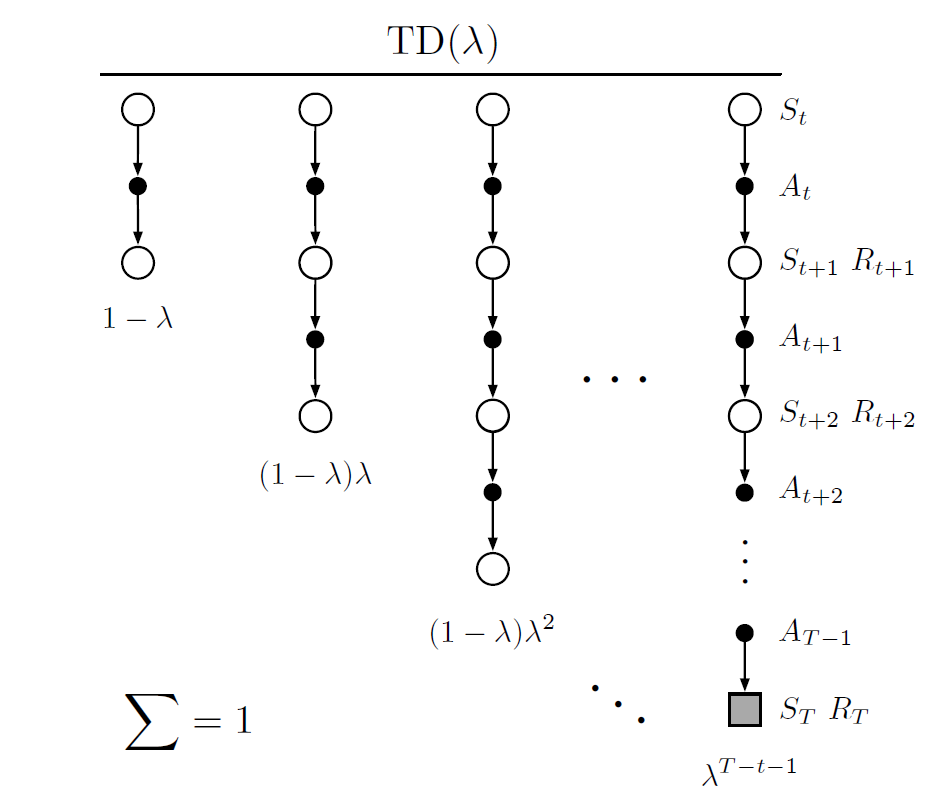

> Answer:<br>
$\sum=(1-\lambda)(\lambda^0+\lambda^1+\lambda^2+...+\lambda^{(T-t-2)})+\lambda^{(T-t-1)}$
<br>**Case-I:** When $\lambda=0, \sum=(1-0)(0)+0=1$
<br>**Case-II:** When $\lambda=1, \sum=0+1=1$
<br>**Case-III:** When $0<\lambda<1, \sum=(1-\lambda)\Biggr(\frac{1-\lambda^{(T-t-1)}}{1-\lambda}\Biggr)+\lambda^{(T-t-1)}=1-\lambda^{(T-t-1)}+\lambda^{(T-t-1)}=1$<br>
**For Case-III, the geometric series sum formula:**$\sum\limits_{k = 1}^n {ar^{k - 1} = \frac{a(1-r^n)}{{1 - r}}}$

<hr>
Q3. In the calculatio of the $\lambda$-return, the one-step return is given the largest weight, $1-\lambda$; the two-step return is given the next largest weight, $(1-\lambda)\lambda$; the three-step return is given the weight $(1-\lambda)\lambda^2$; and so on. The weight fades by $\lambda$ with each additional step. Calculate the time by which this sequence of weights have fallen to half of its initial value. Write this formula and then evaluate it for $\lambda_0=0.5$.

>Answer: <br>
Initial value $=1-\lambda$<br>
**Now, according to the question:**<br>
$(1-\lambda)\lambda^{(n-1)}=0.5*(1-\lambda)$<br>
$(n-1)\log_{\lambda}{\lambda}=log_{\lambda}{(0.5)}$<br>
$n=log_{\lambda}{(0.5)}+1$<br>
**Evaluation for $\lambda=0.5$:**    $n=log_{0.5}{(0.5)}+1=1+1=2$

<hr>
Q4. Using

(a) the definition of n-step return:

$G_{t:t+n} \doteq R_{t+1} + \gamma R_{t+2} + ... + \gamma^{n-1}R_{t+n}+\gamma^n \hat{v}(S_{t+n},\mathbf{w}_{t+n-1})$, $0 \le t \le T-n$ 


(b) the definition of λ – return:

$G_t^{\lambda} \doteq (1-\lambda) \sum_{n=1}^{\infty} \lambda^{n-1}G_{t:t+n}$


derive the following equation: 

$G_t^{\lambda} = \gamma (1-\lambda) \hat{v}(S_{t+1})+R_{t+1}+\gamma \lambda G_{t+1}^{\lambda}$


**Note:** you need to use the fact you have proven in Q2.


>Answer:<br>
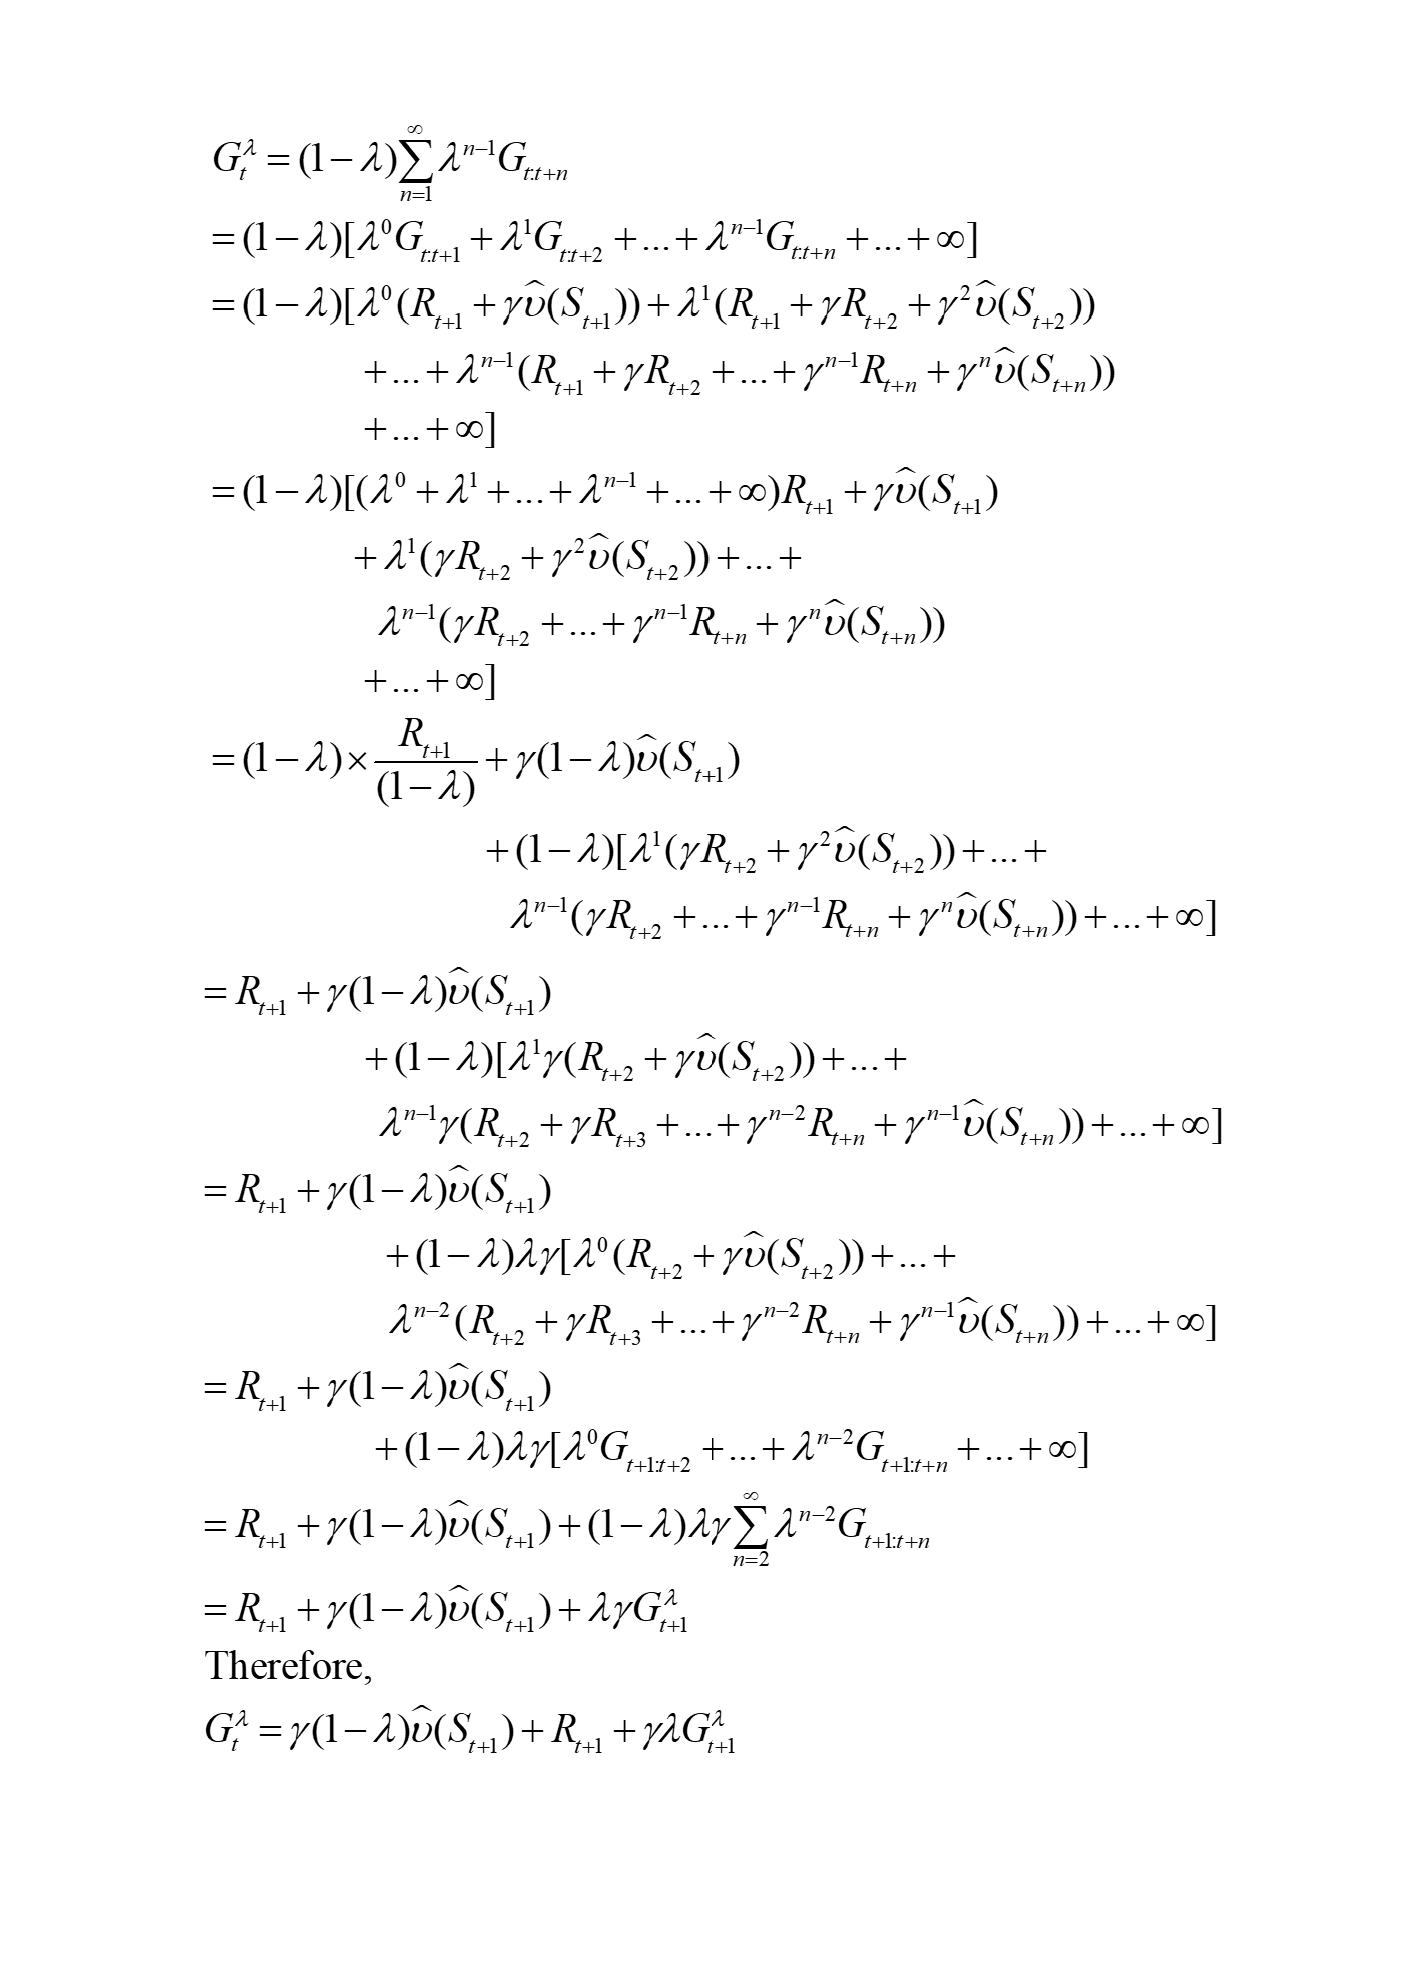